In [1]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB:
    print("Baixando Funções que serão usadas nesse notebook")
    ! shred -u astroFunctions.py
    ! wget https://raw.githubusercontent.com/rafaelmgr12/PHOTOzxcorr/main/functions/ml_algorithims.py -O ml_algorithims.py
    ! pip install healpy
    from google.colab import drive
    drive.mount('/content/drive')
else:
    import sys,os
    home = os.getenv("HOME")
    sys.path.append(home+"/Projetos/master-thesis/functions/") # user here the path where we download the folder PHTOzxcorr

In [2]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import ml_algorithims as ml
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split,ShuffleSplit
# Neural Network Libs

import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras import backend as K
from sklearn.metrics import confusion_matrix
import keras as ks
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [3]:
def rmse_ann3(y_true, y_pred):
    diff = keras.backend.square(
        (y_pred - y_true))
    return keras.backend.sqrt(keras.backend.mean(diff))
def create_bins(lower_bound, width, quantity):
    """ create_bins returns an equal-width (distance) partitioning. 
        It returns an ascending list of tuples, representing the intervals.
        A tuple bins[i], i.e. (bins[i][0], bins[i][1])  with i > 0 
        and i < quantity, satisfies the following conditions:
            (1) bins[i][0] + width == bins[i][1]
            (2) bins[i-1][0] + width == bins[i][0] and
                bins[i-1][1] + width == bins[i][1]
    """
    

    bins = []
    for low in range(lower_bound, 
                     lower_bound + quantity*width + 1, width):
        bins.append((low, low+width))
    return np.asrraty(bins)


In [4]:
data = Table.read("/home/rafael/Projetos/master-thesis/data/vipers.fits").to_pandas()

In [5]:
feat = ['MAG_AUTO_G','MAG_AUTO_R','MAG_AUTO_I','MAG_AUTO_Z','MAG_AUTO_Y',
        'MAG_AUTO_G_DERED','MAG_AUTO_R_DERED','MAG_AUTO_I_DERED','MAG_AUTO_Z_DERED','MAG_AUTO_Y_DERED',
        "WAVG_MAG_PSF_G","WAVG_MAG_PSF_R","WAVG_MAG_PSF_I","WAVG_MAG_PSF_Z","WAVG_MAG_PSF_Y"
       ,'WAVG_MAG_PSF_G_DERED','WAVG_MAG_PSF_R_DERED','WAVG_MAG_PSF_I_DERED','WAVG_MAG_PSF_Z_DERED','WAVG_MAG_PSF_Y_DERED']


In [6]:
data.loc[data[feat[0]]==99,feat[0]] = data[data[feat[0]]!=99][feat[0]].max()
data.loc[data[feat[1]]==99,feat[1]] = data[data[feat[1]]!=99][feat[1]].max()
data.loc[data[feat[2]]==99,feat[2]] = data[data[feat[2]]!=99][feat[2]].max()
data.loc[data[feat[3]]==99,feat[3]] = data[data[feat[3]]!=99][feat[3]].max()
data.loc[data[feat[4]]==99,feat[4]] = data[data[feat[4]]!=99][feat[4]].max()
data.loc[data[feat[5]]>90,feat[5]] = data[data[feat[5]]<90][feat[5]].max()
data.loc[data[feat[6]]>90,feat[6]] = data[data[feat[6]]<90][feat[6]].max()
data.loc[data[feat[7]]>90,feat[7]] = data[data[feat[7]]<90][feat[7]].max()
data.loc[data[feat[8]]>90,feat[8]] = data[data[feat[8]]<90][feat[8]].max()
data.loc[data[feat[9]]>90,feat[9]] = data[data[feat[9]]<90][feat[9]].max()
data.loc[data[feat[10]]>90,feat[10]] = data[data[feat[10]]<90][feat[10]].max()
data.loc[data[feat[11]]>90,feat[11]] = data[data[feat[11]]<90][feat[11]].max()
data.loc[data[feat[12]]>90,feat[12]] = data[data[feat[12]]<90][feat[12]].max()
data.loc[data[feat[13]]>90,feat[13]] = data[data[feat[13]]<90][feat[13]].max()
data.loc[data[feat[14]]>90,feat[14]] = data[data[feat[14]]<90][feat[14]].max()
data.loc[data[feat[15]]>90,feat[15]] = data[data[feat[15]]<90][feat[15]].max()
data.loc[data[feat[16]]>90,feat[16]] = data[data[feat[16]]<90][feat[16]].max()
data.loc[data[feat[17]]>90,feat[17]] = data[data[feat[17]]<90][feat[17]].max()
data.loc[data[feat[18]]>90,feat[18]] = data[data[feat[18]]<90][feat[18]].max()
data.loc[data[feat[19]]>90,feat[19]] = data[data[feat[19]]<90][feat[19]].max()

In [7]:
X,y = ml.get_features_targets_des2(data)
y = y.reshape(-1,1)

In [8]:
X.shape

(47658, 5)

In [9]:
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(200,encode = "onehot",strategy = "uniform")
kbins.fit(y.reshape(-1,1))
y_bins = kbins.transform(y.reshape(-1,1))


In [10]:
from scipy.sparse import hstack,vstack

In [11]:
y_total = hstack([y_bins,y])
y_total.shape

(47658, 201)

In [12]:
y_total = y_total.toarray()

In [13]:
# concatenate the mag for plot purpose only

X = np.concatenate((X,data[['MAG_AUTO_G_DERED','MAG_AUTO_R_DERED','MAG_AUTO_I_DERED','MAG_AUTO_Z_DERED','MAG_AUTO_Y_DERED',]].values),axis = 1 )

In [14]:
X.shape

(47658, 10)

In [15]:
X_train,X_test,y_train,y_test = ml.tts_split(X,y_total,0.3,5)

In [16]:
n_inputs = X_train.shape[1]
n_inputs

10

In [17]:
EarlyStop = EarlyStopping(monitor='reg_mse', mode='min', patience=25)
BATCH_SIZE = 64
STEPS_PER_EPOCH = len(data)//BATCH_SIZE
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
        0.0001,
        decay_steps=STEPS_PER_EPOCH*1000,
        decay_rate=1,
        staircase=False)

In [18]:
inputs = keras.layers.Input(5)
x = BatchNormalization()(inputs)
x = Dense(20, kernel_initializer='normal',  kernel_constraint=max_norm(2.) ,activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                              bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)) (x)
x = BatchNormalization()(x)
x = Dense(15, kernel_initializer='normal',  kernel_constraint=max_norm(2.) ,activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                              bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)) (x)
x = BatchNormalization()(x)
x = Dense(10, kernel_initializer='normal',  kernel_constraint=max_norm(2.) ,activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                              bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)) (x)
output1 = Dense(1,activation = "linear",name = "reg") (x)
output2 = Dense(200,activation = "softmax",name ="pdf")(x)
model = keras.Model(inputs=inputs, outputs=[output1,output2], name="rafael")

In [19]:
model.summary()

Model: "rafael"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 5)            20          input_1[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 20)           120         batch_normalization[0][0]        
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 20)           80          dense[0][0]                      
_____________________________________________________________________________________________

In [20]:
model.compile(
    loss={'reg': 'mean_absolute_error', 
                    'pdf': keras.losses.CategoricalCrossentropy()},loss_weights=[0.1,0.9],
              optimizer=ks.optimizers.Adam(lr_schedule),
              metrics={'pdf': "acc",
                      'reg': "mse"})

In [21]:
history = model.fit(X_train[:,:5], {'pdf': y_train[:,:200], 'reg': y_train[:,200]}, batch_size = 128,epochs=256,validation_split = 0.2)

Epoch 1/256
209/209 [==============================] - 1s 4ms/step - loss: 4.8132 - reg_loss: 0.6523 - pdf_loss: 5.2751 - reg_mse: 0.5254 - pdf_acc: 0.0245 - val_loss: 4.8024 - val_reg_loss: 0.6269 - val_pdf_loss: 5.2659 - val_reg_mse: 0.4320 - val_pdf_acc: 0.0280
Epoch 2/256
209/209 [==============================] - 1s 3ms/step - loss: 4.7277 - reg_loss: 0.5306 - pdf_loss: 5.1936 - reg_mse: 0.4233 - pdf_acc: 0.0429 - val_loss: 4.6975 - val_reg_loss: 0.4050 - val_pdf_loss: 5.1740 - val_reg_mse: 0.2380 - val_pdf_acc: 0.0504
Epoch 3/256
209/209 [==============================] - 1s 3ms/step - loss: 4.5894 - reg_loss: 0.4039 - pdf_loss: 5.0540 - reg_mse: 0.2684 - pdf_acc: 0.0452 - val_loss: 4.4847 - val_reg_loss: 0.2384 - val_pdf_loss: 4.9560 - val_reg_mse: 0.1113 - val_pdf_acc: 0.0402
Epoch 4/256
209/209 [==============================] - 1s 3ms/step - loss: 4.4291 - reg_loss: 0.2971 - pdf_loss: 4.8876 - reg_mse: 0.1459 - pdf_acc: 0.0443 - val_loss: 4.3233 - val_reg_loss: 0.2449 - val_p

In [22]:
test_predictions = model.predict(X_test[:,:5])


print("Testing set Mean Abs Error: {:5.4f} ".format(mean_absolute_error(y_test[:,200],test_predictions[0])))
print("\n")
print("Testing set Mean Square Error: {:5.4f} ".format(mean_squared_error(y_test[:,200],test_predictions[0])))
print("\n")
print("Testing set Root Mean Square Error: {:5.4f} ".format(np.sqrt(mean_squared_error(y_test[:,200],test_predictions[0]))))

Testing set Mean Abs Error: 0.0806 


Testing set Mean Square Error: 0.0161 


Testing set Root Mean Square Error: 0.1268 


In [85]:
zspec = y_test[:,200].flatten()
zphot = test_predictions[0].flatten()
pdf = test_predictions[1]
x_plot = np.linspace(0,3.5,200)

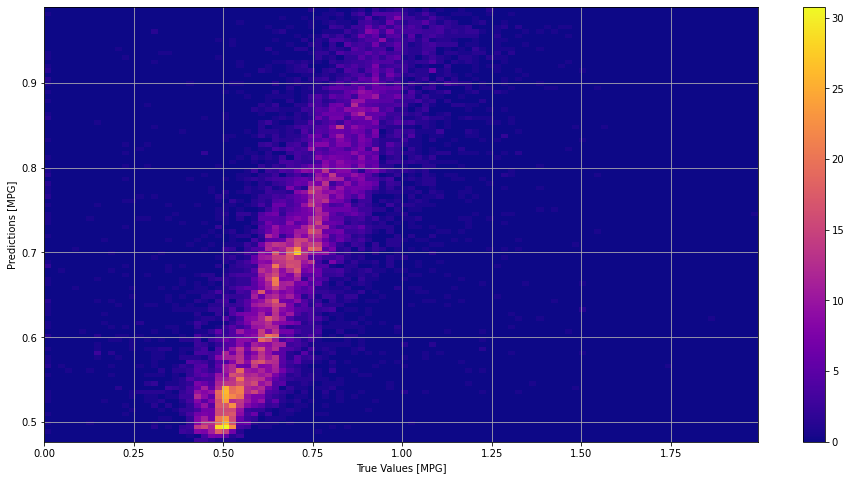

In [24]:
plt.figure(figsize=(16, 8))
plt.hist2d(zspec,zphot, bins= 100,density=True,cmap = "plasma")
plt.colorbar()
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.grid()
#plt.show()
plt.savefig("plots/ann_hist2d.png")
#plt.close()

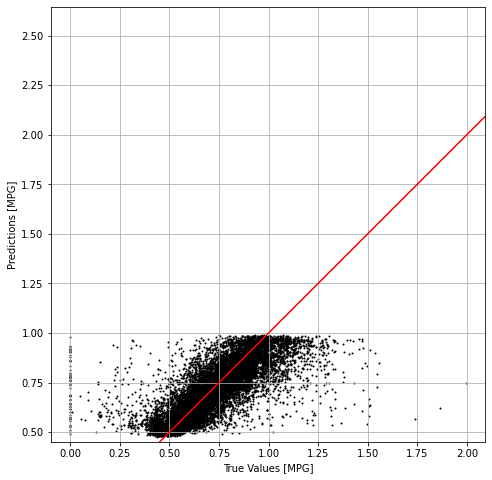

In [25]:
plt.figure(figsize=(16, 8))
plt.scatter(zspec, zphot, s=1, c="k")
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.grid()
_ = plt.plot([-100, 100], [-100, 100],color = "red")
#plt.show()
plt.savefig("plots/scatter_ann.png",dpi = 300)
#plt.close()


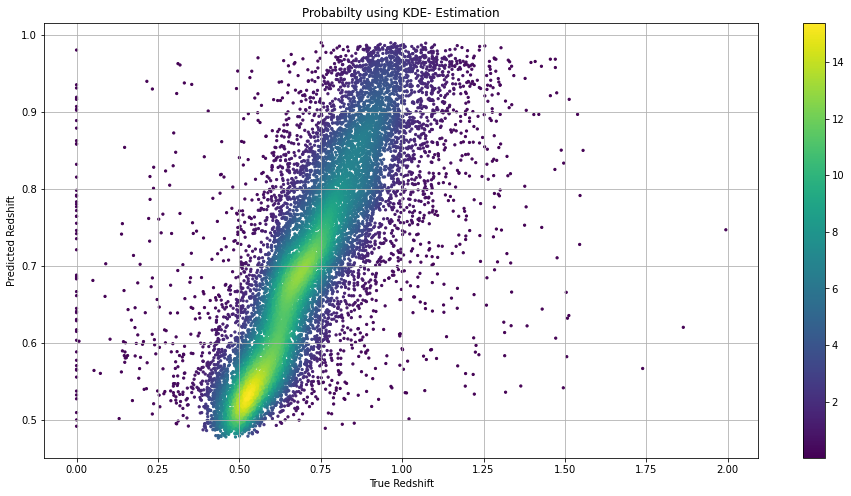

In [26]:
from scipy.stats import gaussian_kde
plt.figure(figsize=(16,8))
plt.title("Probabilty using KDE- Estimation")
xy = np.hstack([zspec.reshape(-1,1),zphot.reshape(-1,1)]).T
z = gaussian_kde(xy)(xy)
plt.scatter(zspec,zphot,c=z,s=5,cmap = "viridis")
plt.xlabel("True Redshift")
plt.ylabel("Predicted Redshift")
plt.grid()
plt.colorbar()
plt.savefig("plots/scatter_probs_ann_rafael.png",dpi =300)

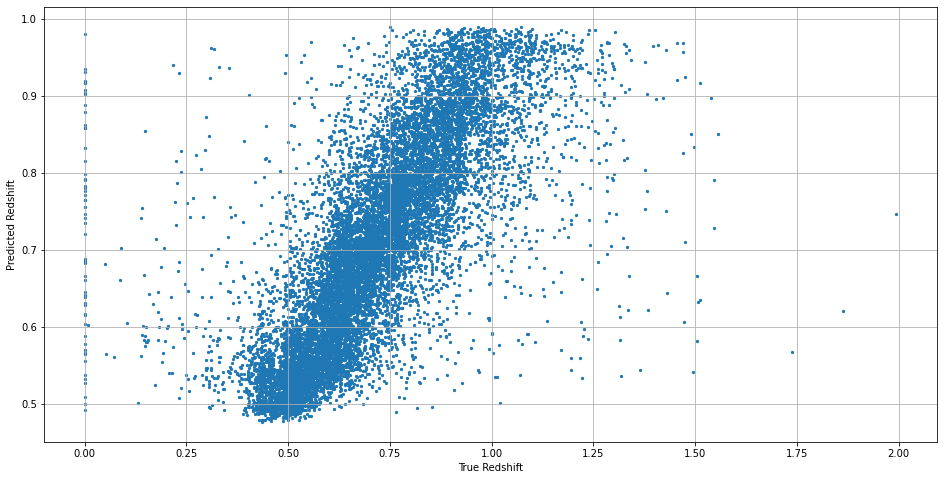

In [27]:
plt.figure(figsize=(16,8))
plt.scatter(zspec,zphot,s=5,cmap = "viridis")
plt.xlabel("True Redshift")
plt.ylabel("Predicted Redshift")
plt.grid()
plt.savefig("plots/scatter.ann_rafael.png",dpi =300)

In [28]:
redshift = pd.DataFrame()
redshift["z_phot"] = zphot
redshift["z_spec"] = zspec

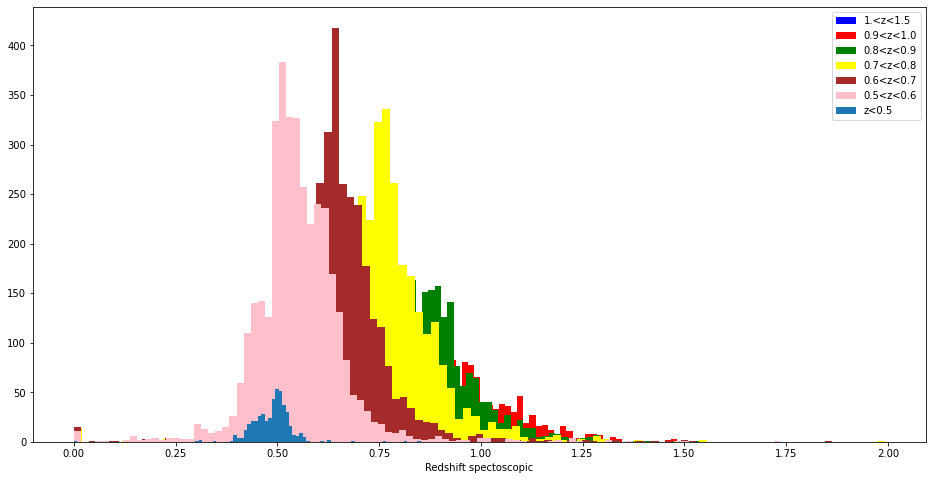

In [29]:
plt.figure(figsize=(16,8))
plt.hist(redshift[(redshift["z_phot"] > 1.) & (redshift["z_phot"] < 1.5)]["z_spec"].values,label = "1.<z<1.5",bins = 100, color = "b")
plt.hist(redshift[(redshift["z_phot"] > 0.9) & (redshift["z_phot"] < 1.)]["z_spec"].values,label = "0.9<z<1.0",bins = 100,color = "r")
plt.hist(redshift[(redshift["z_phot"] > 0.8) & (redshift["z_phot"] < 0.9)]["z_spec"].values,label = "0.8<z<0.9",bins = 100,color = "g")
plt.hist(redshift[(redshift["z_phot"] > 0.7) & (redshift["z_phot"] < 0.8)]["z_spec"].values,label = "0.7<z<0.8",bins = 100,color = "yellow")
plt.hist(redshift[(redshift["z_phot"] > 0.6) & (redshift["z_phot"] < 0.7)]["z_spec"].values,label = "0.6<z<0.7",bins = 100,color = "brown")
plt.hist(redshift[(redshift["z_phot"] > 0.5) & (redshift["z_phot"] < 0.6)]["z_spec"].values,label = "0.5<z<0.6",bins = 100,color = "pink")
plt.hist(redshift[redshift["z_phot"] < 0.5]["z_spec"].values,label = "z<0.5",bins = 100)
plt.xlabel("Redshift spectoscopic")
plt.legend()

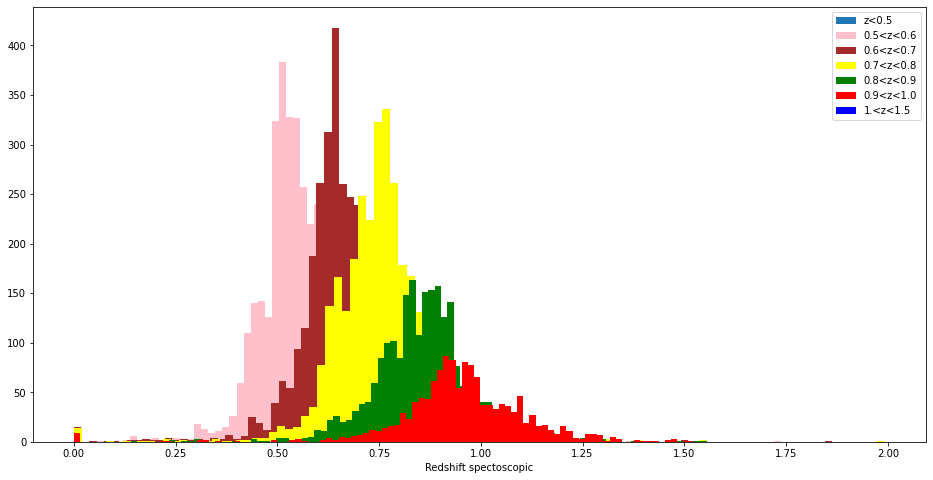

In [30]:
plt.figure(figsize=(16,8))
plt.hist(redshift[redshift["z_phot"] < 0.5]["z_spec"].values,label = "z<0.5",bins = 100)
plt.hist(redshift[(redshift["z_phot"] > 0.5) & (redshift["z_phot"] < 0.6)]["z_spec"].values,label = "0.5<z<0.6",bins = 100,color = "pink" )
plt.hist(redshift[(redshift["z_phot"] > 0.6) & (redshift["z_phot"] < 0.7)]["z_spec"].values,label = "0.6<z<0.7",bins = 100,color = "brown")
plt.hist(redshift[(redshift["z_phot"] > 0.7) & (redshift["z_phot"] < 0.8)]["z_spec"].values,label = "0.7<z<0.8",bins = 100,color = "yellow")
plt.hist(redshift[(redshift["z_phot"] > 0.8) & (redshift["z_phot"] < 0.9)]["z_spec"].values,label = "0.8<z<0.9",bins = 100,color = "g")
plt.hist(redshift[(redshift["z_phot"] > 0.9) & (redshift["z_phot"] < 1.)]["z_spec"].values,label = "0.9<z<1.0",bins = 100,color = "r")
plt.hist(redshift[(redshift["z_phot"] > 1.) & (redshift["z_phot"] < 1.5)]["z_spec"].values,label = "1.<z<1.5",bins = 100,color = "b")
plt.xlabel("Redshift spectoscopic")
plt.legend()

In [31]:
error = (zphot - zspec)

In [32]:
redshift ["error"] = error 

In [33]:
sigma68 = (int(len(error)*0.159),int(len(error)*(1-0.159)))
sigma68

(2273, 12024)

In [34]:
err = np.sort(error)

In [35]:
sigma68 = (int(len(err)*0.159),int(len(err)*(1-0.159)))

print("$\sigma_{68}$ error is ", err[sigma68[0]],err[sigma68[1]])

$\sigma_{68}$ error is  -0.09175121784210205 0.0765371322631836


In [36]:
sigma68_arr = err[2273:12024]

In [37]:
x = np.array(range(0,20+1))*5
x[0]=1

ind = x*len(error)//100

In [38]:
x = np.array(range(0,20+1))*5
x[0]=1

ind = x*len(sigma68_arr)//100

Text(0, 0.5, '$\\sigma_{68}$')

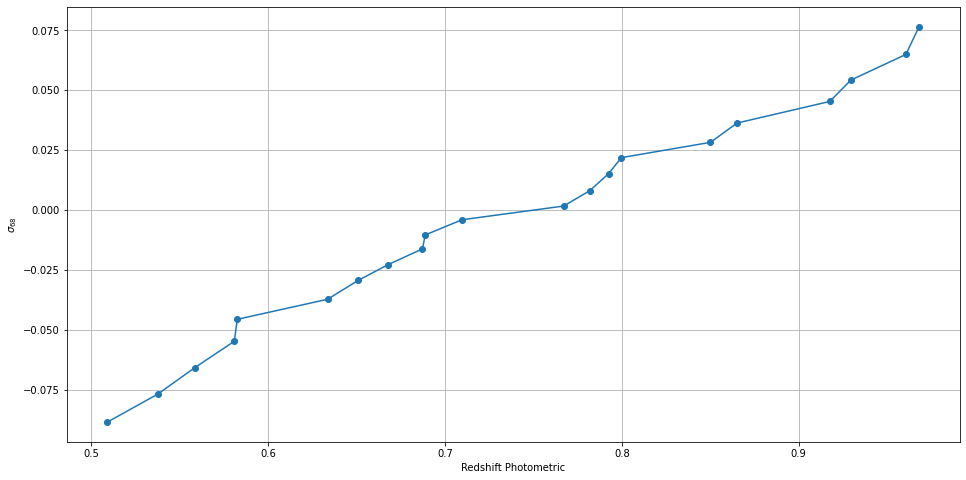

In [39]:
plt.figure(figsize = (16,8))
plt.plot(np.sort(zphot[ind-1]),sigma68_arr[ind-1],'o-')
#plt.scatter(test.z_phot[ind-1],test.error[ind-1],s = 10, c = "red")
plt.grid()
plt.xlabel("Redshift Photometric")
plt.ylabel("$\sigma_{68}$")


In [40]:
bins = []
j = 0.5
for i in range(20):
    j = j + 0.05
    b = (zphot>(j-0.05)) & (zphot<j)
    bins.append(b)

In [41]:
bins.insert(0,zphot<(0.5))

In [42]:
print("Object in each bins: ")
for i in range(len(bins)):
    print("bin"+str(i)+" :",zphot[bins[i]].shape[0])

Object in each bins: 
bin0 : 457
bin1 : 1897
bin2 : 1761
bin3 : 1445
bin4 : 1722
bin5 : 1754
bin6 : 1536
bin7 : 1240
bin8 : 1159
bin9 : 777
bin10 : 550
bin11 : 0
bin12 : 0
bin13 : 0
bin14 : 0
bin15 : 0
bin16 : 0
bin17 : 0
bin18 : 0
bin19 : 0
bin20 : 0


In [43]:
import metrics

In [44]:
results = []
for i in range((10)):
    aux = metrics.compute_metrics(zspec[bins[i]],zphot[bins[i]],"ANN-rafael-bins"+str(i))
    aux = aux.to_frame()
    results.append(aux)
    del aux


In [45]:
df = pd.concat(results,ignore_index=False,axis = 1)

In [46]:
df

,ANN-rafael-bins0,ANN-rafael-bins1,ANN-rafael-bins2,ANN-rafael-bins3,ANN-rafael-bins4,ANN-rafael-bins5,ANN-rafael-bins6,ANN-rafael-bins7,ANN-rafael-bins8,ANN-rafael-bins9
RMSE_znorm,0.040025,0.0618416,0.0798526,0.0874585,0.0748147,0.0765465,0.0926767,0.0810881,0.0881345,0.123738
bias_znorm,0.00520888,0.00579924,0.00282632,0.00306991,0.00471699,-0.00270619,-0.00118308,-0.00293678,-0.00171761,0.00525519
std_znorm,0.0396846,0.0615691,0.0798025,0.0874046,0.0746659,0.0764987,0.0926691,0.0810349,0.0881178,0.123626
RMSE,0.0549903,0.0944095,0.120823,0.133576,0.112306,0.126698,0.13706,0.13756,0.138365,0.176048
|znorm| > 0.15 (%),0.875274,3.00474,4.48609,4.42907,3.07782,3.99088,4.10156,4.19355,4.1415,6.04891
|znorm| > 3std (%),1.53173,1.7923,2.04429,2.49135,1.4518,1.53934,1.17188,1.29032,0.69025,1.6731
scatter,0.040025,0.0618416,0.0798526,0.0874585,0.0748147,0.0765465,0.0926767,0.0810881,0.0881345,0.123738
bias,0.0236394,0.0386467,0.0495819,0.0485993,0.0437698,0.0469327,0.0522133,0.0527405,0.0508897,0.064449
fr015,99.1247,96.9953,95.5139,95.5709,96.9222,96.0091,95.8984,95.8065,95.8585,93.9511
sigma68,"(-0.02873328, 0.04761916)","(-0.05969775, 0.06826887)","(-0.07979244, 0.07447976)","(-0.07979637, 0.06919229)","(-0.07802767, 0.07180762)","(-0.09587622, 0.07965195)","(-0.11613792, 0.08136463)","(-0.1170131, 0.08947855)","(-0.11788607, 0.08476663)","(-0.15188873, 0.10073954)"


In [47]:
stack = []
for i in range(len(bins)):
    stack.append(pdf[bins[i],:])


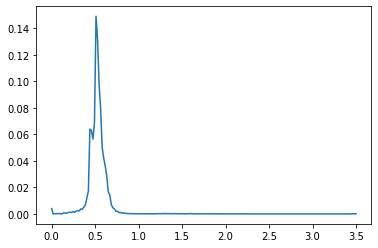

In [86]:
plt.plot(x_plot,pdf[0,:])

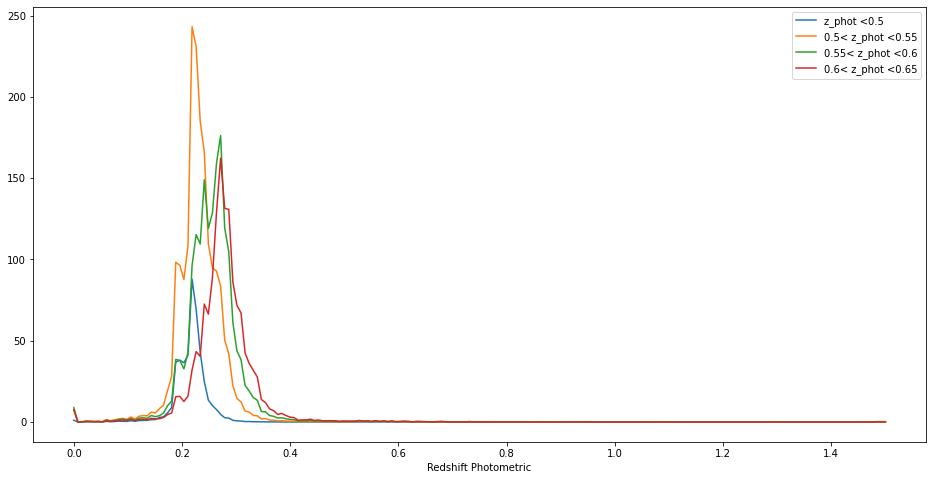

In [49]:
plt.figure(figsize=(16,8))
#plt.title("PDF Stacked with bins")
j = 0.5
plt.plot(x_plot,np.sum(stack[0],axis = 0),label = "z_phot <0.5")
for i in range(3):
    j = j + 0.05
    st1 = round(j-0.05,3)
    st2 = round(j,3)
    plt.plot(x_plot,np.sum(stack[i+1],axis = 0),label = str(st1)+"< z_phot <"+str(st2))
plt.legend()
plt.xlabel("Redshift Photometric")
plt.savefig("plots/pdf_stacked_phot.png",dpi = 500)

In [50]:
bins_spec = []
j = 0.5
for i in range(20):
    j = j + 0.05
    b = (zspec>(j-0.05)) & (zspec<j)
    bins_spec.append(b)
bins_spec.insert(0,zspec<(0.5))
stack_spec = []
for i in range(len(bins_spec)):
    stack_spec.append(pdf[bins_spec[i],:])

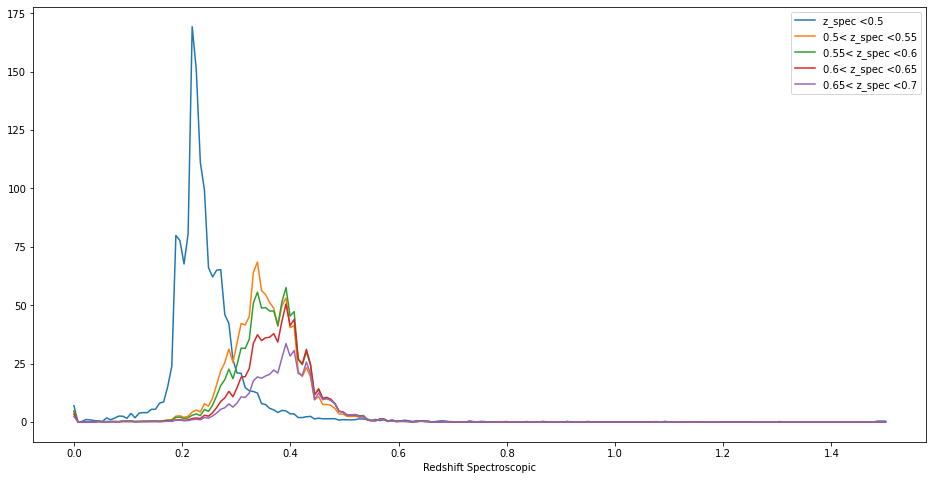

In [51]:
plt.figure(figsize=(16,8))
#plt.title("PDF Stacked with bins")
plt.plot(x_plot,np.sum(stack_spec[0],axis = 0),label = "z_spec <0.5")
j = 0.5
for i in range(6,10):
    j = j + 0.05
    st1 = round(j-0.05,3)
    st2 = round(j,3)
    plt.plot(x_plot,np.sum(stack_spec[i+1],axis = 0),label = str(st1)+"< z_spec <"+str(st2))
plt.legend()
plt.xlabel("Redshift Spectroscopic")
plt.savefig("plots/pdf_stacked_spec.png",dpi = 500)

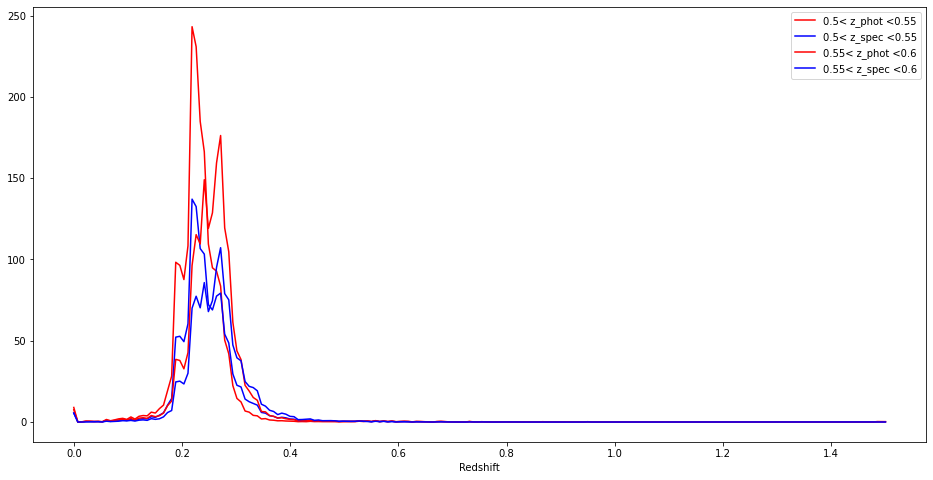

In [52]:
plt.figure(figsize=(16,8))
#plt.title("PDF Stacked with bins")
j = 0.5
for i in range(2):
    j = j + 0.05
    st1 = round(j-0.05,3)
    st2 = round(j,3)
    plt.plot(x_plot,np.sum(stack[i+1],axis = 0),label = str(st1)+"< z_phot <"+str(st2), c = "red")
    plt.plot(x_plot,np.sum(stack_spec[i+1],axis = 0),label = str(st1)+"< z_spec <"+str(st2), c = "blue")

plt.legend()
plt.xlabel("Redshift")
plt.savefig("plots/pdf_stacked_photandspec.png",dpi = 500)

In [87]:
cdf = []
for i in range(len(pdf)):
    cdf.append(np.cumsum(pdf[i,:]))

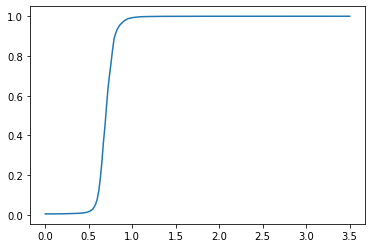

In [88]:
plt.plot(x_plot,cdf[6778])

In [89]:
def mc_cdf(cdf,bins):
    rand = np.random.random()
    ind = np.where(cdf >= rand)
    frac = (rand-cdf[ind[0][0]-1])/(cdf[ind[0][0]]-cdf[ind[0][0]-1])
    #print(frac)
    zfinal = bins[ind[0][0]-1] + frac*(bins[ind[0][0]]-bins[ind[0][0]-1])
    return zfinal,rand,cdf[ind[0][0]-1],cdf[ind[0][0]]


In [90]:
mc_cdf(cdf[0],x_plot)

(0.594787225752993, 0.8648300914504865, 0.8303128, 0.872515)

In [91]:
mc = []
for i in range(10000):
    zfinal, rand, cdf1,cdf2 = mc_cdf(cdf[200],x_plot)
    mc.append(zfinal)

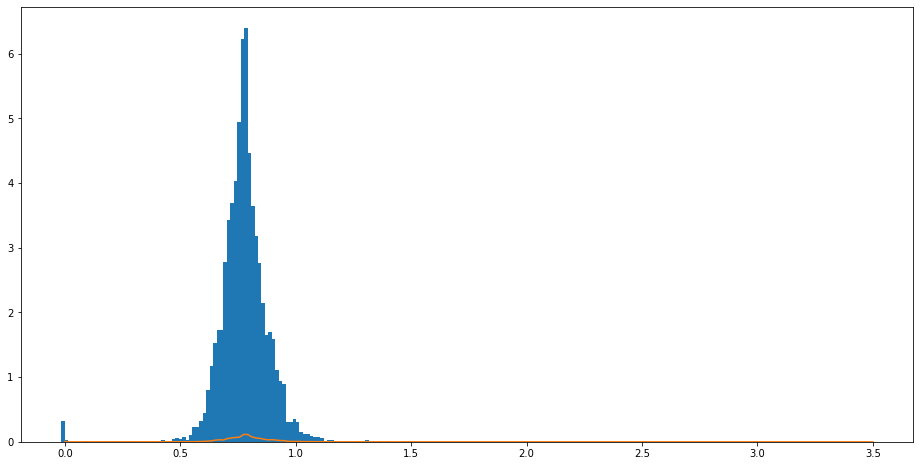

In [93]:
plt.figure(figsize=(16,8))
plt.hist(mc,bins=100,density = True);
plt.plot(x_plot, pdf[200])
plt.savefig("testes.png")

## Inverse CDF Sampling

In [63]:
from scipy.interpolate import interp1d

In [81]:
inv_cdf = interp1d(x_plot,cdf[0])

In [82]:
ys = inv_cdf(x_plot)

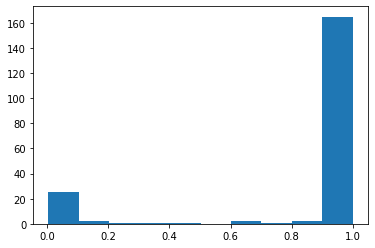

In [83]:
plt.hist(ys,bins=10);

## Create a csv file

In [60]:
final_data = pd.DataFrame()
final_data["z"] = zspec 
final_data["ann:z"] = zphot
final_data["error"] = error
final_data['MAG_AUTO_G_DERED'] = X_test[:,5]
final_data['MAG_AUTO_R_DERED'] = X_test[:,6]
final_data['MAG_AUTO_I_DERED'] = X_test[:,7]
final_data['MAG_AUTO_Z_DERED'] = X_test[:,8]
final_data['MAG_AUTO_Y_DERED'] = X_test[:,9]


In [61]:
for i in range(200):
    final_data["ann_pdf_"+str(i)] = pdf[:,i]

In [62]:
final_data

,z,ann:z,error,MAG_AUTO_G_DERED,MAG_AUTO_R_DERED,MAG_AUTO_I_DERED,MAG_AUTO_Z_DERED,MAG_AUTO_Y_DERED,ann_pdf_0,ann_pdf_1,...,ann_pdf_190,ann_pdf_191,ann_pdf_192,ann_pdf_193,ann_pdf_194,ann_pdf_195,ann_pdf_196,ann_pdf_197,ann_pdf_198,ann_pdf_199
0,0.5478,0.524741,-0.023059,21.675369,20.476053,19.978825,19.708084,19.598150,0.002718,5.510289e-07,...,6.019784e-07,5.780822e-07,5.451996e-07,5.521141e-07,5.357053e-07,4.829860e-07,5.617796e-07,5.432709e-07,0.000080,0.000074
1,0.7141,0.640455,-0.073645,23.153423,21.901344,21.184584,20.886852,21.120953,0.004191,1.225430e-08,...,1.333367e-08,1.269621e-08,1.114178e-08,1.342766e-08,1.094966e-08,1.201785e-08,1.084356e-08,1.231823e-08,0.000009,0.000005
2,0.5526,0.626525,0.073924,23.883087,22.240238,21.474537,21.000954,20.886305,0.003949,1.943321e-08,...,2.015103e-08,2.185768e-08,1.843078e-08,1.948688e-08,1.731282e-08,1.704958e-08,1.563588e-08,2.012376e-08,0.000016,0.000008
3,0.5957,0.648952,0.053252,21.567278,20.640121,20.107042,19.871243,19.577147,0.008019,3.199855e-09,...,2.707479e-09,2.942508e-09,2.458061e-09,2.981802e-09,2.182407e-09,2.371670e-09,2.415843e-09,2.781435e-09,0.000006,0.000004
4,0.5442,0.552012,0.007812,22.540119,21.466885,21.020325,20.894415,21.328066,0.002816,8.685105e-08,...,7.399174e-08,7.981043e-08,7.066094e-08,7.414998e-08,7.122791e-08,6.471276e-08,6.458262e-08,8.075245e-08,0.000029,0.000013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14293,0.8753,0.876265,0.000965,23.523746,22.821526,22.208662,21.704287,21.453571,0.004015,3.191189e-08,...,2.606854e-08,3.085297e-08,2.714398e-08,2.970711e-08,2.450992e-08,2.498666e-08,2.467305e-08,2.902620e-08,0.000025,0.000019
14294,0.9257,0.744947,-0.180753,23.297079,22.025640,20.968119,20.592426,20.355036,0.005563,3.574092e-08,...,3.395840e-08,4.347009e-08,3.460714e-08,3.110791e-08,2.583463e-08,3.071577e-08,2.641444e-08,3.717474e-08,0.000007,0.000003
14295,0.8798,0.867500,-0.012300,25.811621,23.499617,22.159006,21.489374,22.258078,0.003089,6.031582e-07,...,5.463859e-07,6.136248e-07,5.702407e-07,5.464750e-07,5.111932e-07,5.352570e-07,5.367005e-07,5.811989e-07,0.000019,0.000010
14296,0.5149,0.548138,0.033238,24.324493,22.361763,21.713682,21.323183,21.799175,0.003293,3.243919e-07,...,2.834747e-07,3.117404e-07,2.790707e-07,2.749368e-07,2.759039e-07,2.584774e-07,2.439139e-07,3.142552e-07,0.000054,0.000024


In [63]:
#final_data.to_csv("ann-rafael-results.csv",index = False)